<a href="https://colab.research.google.com/github/SergiyDovgopolyk/Data_Science/blob/main/HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, SpatialDropout1D, Dropout, SimpleRNN

In [2]:
max_features = 20000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32
embedding_dim = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

**BRNN Model**

In [5]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

model.add(SpatialDropout1D(0.2))

# Додавання Bidirectional LSTM шару з 64 вузлами
model.add(Bidirectional(LSTM(64)))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           640000    
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 32)           0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 689793 (2.63 MB)
Trainable params: 689793 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 [==============================] - 186s 1s/step - loss: 0.6692 - acc: 0.5806 - val_loss: 0.5673 - val_acc: 0.7363
Epoch 2/5
137/137 [==============================] - 192s 1s/step - loss: 0.4337 - acc: 0.8135 - val_loss: 0.3806 - val_acc: 0.8395
Epoch 3/5
137/137 [==============================] - 195s 1s/step - loss: 0.3164 - acc: 0.8738 - val_loss: 0.3151 - val_acc: 0.8712
Epoch 4/5
137/137 [==============================] - 194s 1s/step - loss: 0.2592 - acc: 0.9001 - val_loss: 0.3064 - val_acc: 0.8799
Epoch 5/5
137/137 [==============================] - 195s 1s/step - loss: 0.2234 - acc: 0.9177 - val_loss: 0.3447 - val_acc: 0.8561


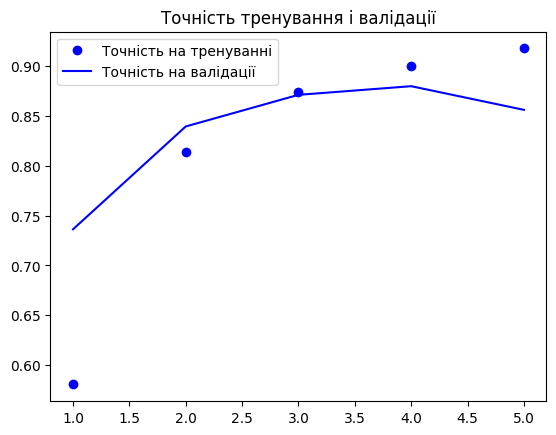

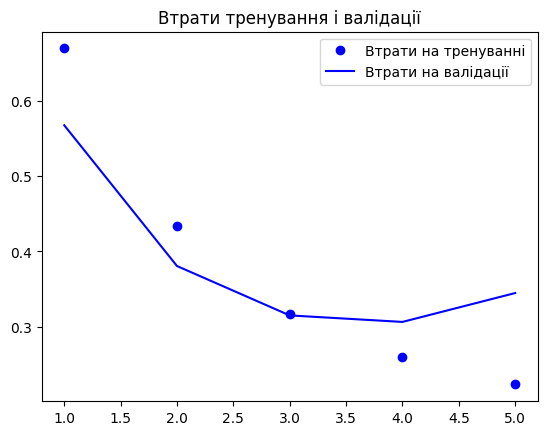

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


In [10]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 81s 102ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 80s 103ms/step - loss: 0.3516 - acc: 0.8533
Test Loss: 0.3516284227371216
Test Accuracy: 0.8532800078392029


In [11]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 23s 145ms/step - loss: 0.4717 - acc: 0.7651 - val_loss: 0.3218 - val_acc: 0.8639
Epoch 2/5
137/137 [==============================] - 16s 113ms/step - loss: 0.2254 - acc: 0.9145 - val_loss: 0.3037 - val_acc: 0.8787
Epoch 3/5
137/137 [==============================] - 14s 105ms/step - loss: 0.1392 - acc: 0.9527 - val_loss: 0.3927 - val_acc: 0.8700
Epoch 4/5
137/137 [==============================] - 13s 99ms/step - loss: 0.0878 - acc: 0.9719 - val_loss: 0.4306 - val_acc: 0.8743
Epoch 5/5
137/137 [==============================] - 12s 86ms/step - loss: 0.0580 - acc: 0.9831 - val_loss: 0.4236 - val_acc: 0.8637


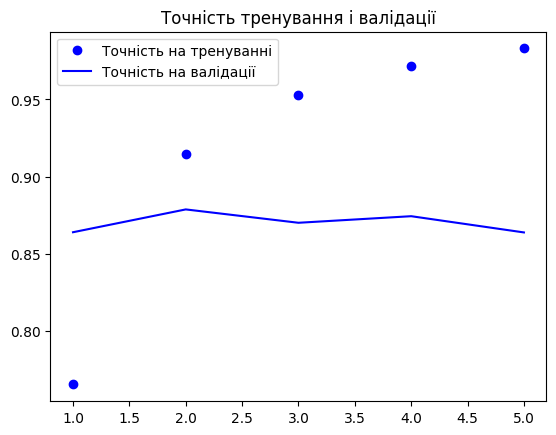

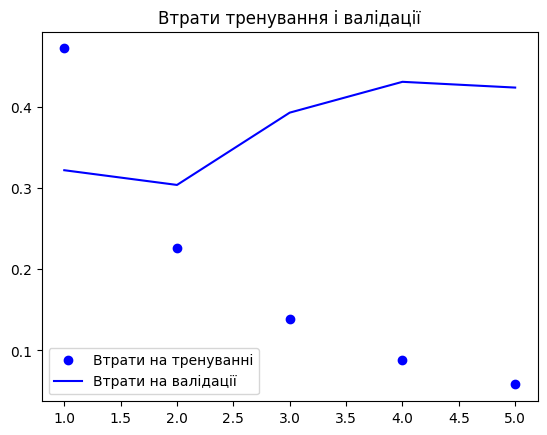

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [15]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 11s 13ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 11s 14ms/step - loss: 0.4642 - acc: 0.8496
Test Loss: 0.46415022015571594
Test Accuracy: 0.8496000170707703


**Побудова моделі DRNN**

In [16]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання декількох Bidirectional LSTM шару з 32 вузлами
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)



In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [18]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 42s 260ms/step - loss: 0.4763 - acc: 0.7605 - val_loss: 0.3221 - val_acc: 0.8649
Epoch 2/5
137/137 [==============================] - 28s 205ms/step - loss: 0.2315 - acc: 0.9165 - val_loss: 0.3109 - val_acc: 0.8688
Epoch 3/5
137/137 [==============================] - 25s 186ms/step - loss: 0.1237 - acc: 0.9597 - val_loss: 0.3306 - val_acc: 0.8744
Epoch 4/5
137/137 [==============================] - 23s 166ms/step - loss: 0.0686 - acc: 0.9794 - val_loss: 0.3769 - val_acc: 0.8648
Epoch 5/5
137/137 [==============================] - 23s 168ms/step - loss: 0.0502 - acc: 0.9866 - val_loss: 0.4964 - val_acc: 0.8597


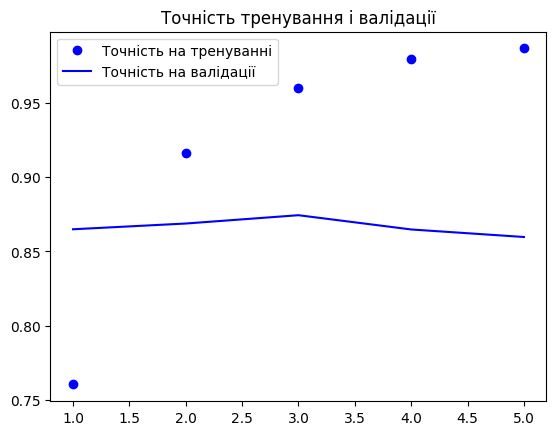

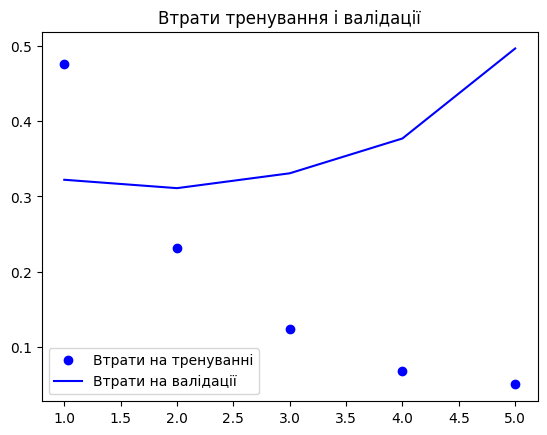

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [20]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 21s 24ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 21s 27ms/step - loss: 0.5219 - acc: 0.8525
Test Loss: 0.5219410061836243
Test Accuracy: 0.8525199890136719


In [36]:
# Побудова моделі
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 bidirectional_8 (Bidirecti  (None, 500, 128)          98816     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 500, 128)          0         
                                                                 
 bidirectional_9 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [39]:
history = model.fit(input_train, y_train, epochs=3, batch_size=128, validation_split=0.3)

Epoch 1/3
137/137 [==============================] - 27s 151ms/step - loss: 0.6073 - acc: 0.6429 - val_loss: 0.4220 - val_acc: 0.8139
Epoch 2/3
137/137 [==============================] - 18s 134ms/step - loss: 0.3730 - acc: 0.8441 - val_loss: 0.3819 - val_acc: 0.8372
Epoch 3/3
137/137 [==============================] - 17s 124ms/step - loss: 0.2818 - acc: 0.8926 - val_loss: 0.3552 - val_acc: 0.8565


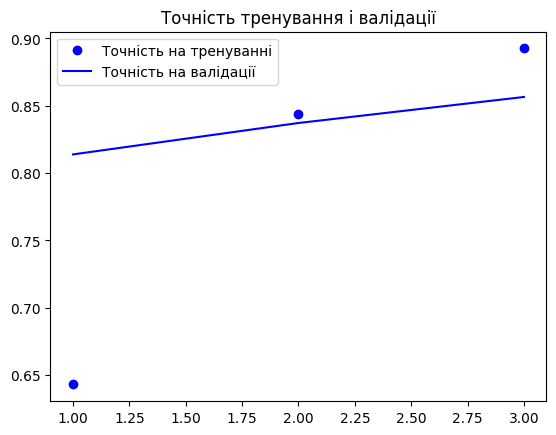

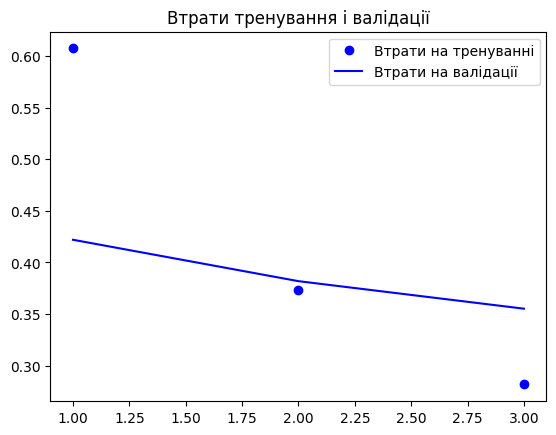

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [41]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 21s 25ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 19s 25ms/step - loss: 0.3564 - acc: 0.8528
Test Loss: 0.3563998341560364
Test Accuracy: 0.852840006351471


**RNN Model**

In [12]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 500, 64)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2580673 (9.84 MB)
Trainable params: 2580

In [21]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 86s 612ms/step - loss: 0.0431 - acc: 0.9846 - val_loss: 0.8277 - val_acc: 0.8123
Epoch 2/5
137/137 [==============================] - 85s 621ms/step - loss: 0.0371 - acc: 0.9865 - val_loss: 0.7949 - val_acc: 0.8076
Epoch 3/5
137/137 [==============================] - 86s 628ms/step - loss: 0.0143 - acc: 0.9953 - val_loss: 0.8965 - val_acc: 0.8337
Epoch 4/5
137/137 [==============================] - 84s 614ms/step - loss: 0.0159 - acc: 0.9946 - val_loss: 0.9947 - val_acc: 0.7913
Epoch 5/5
137/137 [==============================] - 83s 604ms/step - loss: 0.0491 - acc: 0.9840 - val_loss: 0.9333 - val_acc: 0.8155


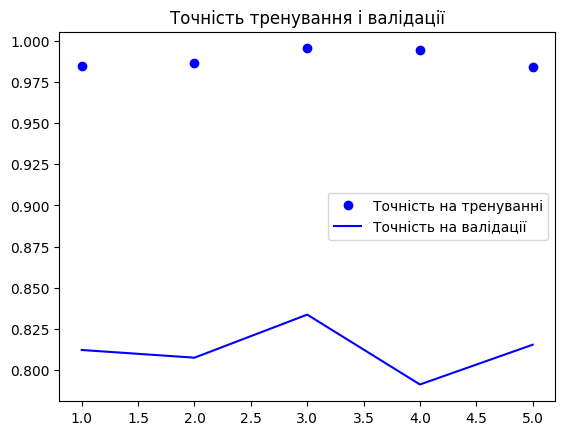

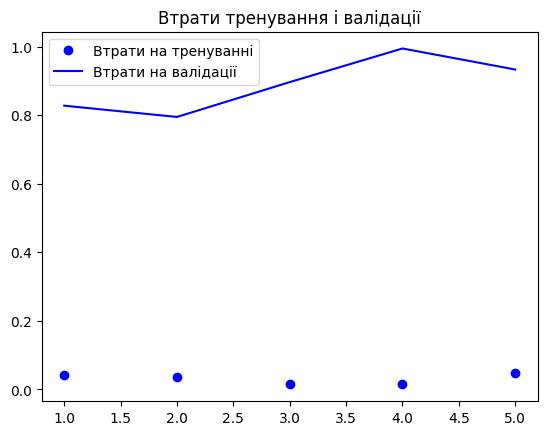

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [23]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 47s 60ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 46s 59ms/step - loss: 0.9540 - acc: 0.8099
Test Loss: 0.9540009498596191
Test Accuracy: 0.8099200129508972


**LSTM Model**

In [29]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 lstm_3 (LSTM)               (None, 500, 64)           49408     
                                                                 
 dropout_4 (Dropout)         (None, 500, 64)           0         
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2642497 (10.08 MB)
Trainable params: 264

In [32]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 284s 2s/step - loss: 0.5927 - acc: 0.6677 - val_loss: 0.4293 - val_acc: 0.8143
Epoch 2/5
137/137 [==============================] - 280s 2s/step - loss: 0.3581 - acc: 0.8500 - val_loss: 0.3409 - val_acc: 0.8571
Epoch 3/5
137/137 [==============================] - 285s 2s/step - loss: 0.2890 - acc: 0.8876 - val_loss: 0.3817 - val_acc: 0.8323
Epoch 4/5
137/137 [==============================] - 281s 2s/step - loss: 0.2422 - acc: 0.9098 - val_loss: 0.3053 - val_acc: 0.8763
Epoch 5/5
137/137 [==============================] - 290s 2s/step - loss: 0.1990 - acc: 0.9269 - val_loss: 0.3058 - val_acc: 0.8769


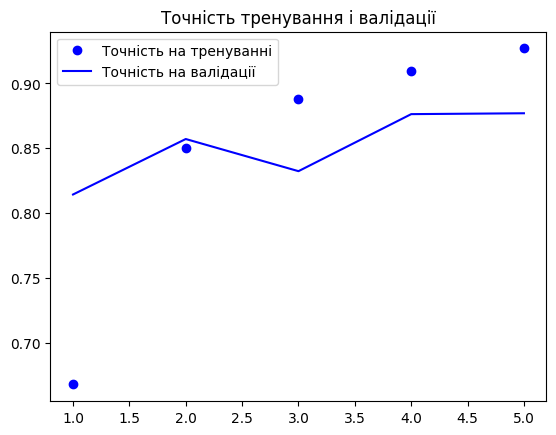

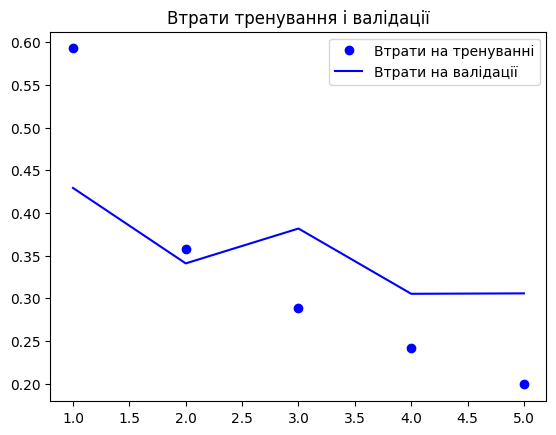

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [34]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 112s 142ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 117s 149ms/step - loss: 0.3208 - acc: 0.8654
Test Loss: 0.3207535147666931
Test Accuracy: 0.8653600215911865


**Висновок**

При порівнянні цих моделей, основними метриками були точність (accuracy) та втрати (loss). Результати навчання та тестування моделей показали, що найбільш ефективними для даного датасету, виявились LSTM, двостороння LSTM та глибока моделі. Вони показують кращі результати на задачах обробки природної мови завдяки їхній здатності обробляти довгострокові залежності.